In [ ]:
# Install Hadoop
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=1bc1d6c009b3fb9761c846341240323df4450fd028afd3d492cf2b9bd6e46195
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
# Import SparkSession
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [ ]:
# Create a Spark Session and configure Spark context
spark=SparkSession.builder\
.master("local[*]")\
.appName("WordCount")\
.getOrCreate()
sc=spark.sparkContext

In [ ]:
# Check spark session information
spark


In [ ]:
#Mount (connect to) Google drive to be able to read from it (copy data files into HDFS)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = spark.read.csv('/content/drive/My\  Drive/students.df.cleaned.ml.csv', header = True, inferSchema = True)
df.printSchema()


root
 |-- _c0: integer (nullable = true)
 |-- MaritalStatus: integer (nullable = true)
 |-- ApplicationMode: integer (nullable = true)
 |-- ApplicationOrder: integer (nullable = true)
 |-- Course: integer (nullable = true)
 |-- DaytimeEveningAttendance: integer (nullable = true)
 |-- PreviousQualification: integer (nullable = true)
 |-- Nationality: integer (nullable = true)
 |-- MothersQualification: integer (nullable = true)
 |-- FathersQualification: integer (nullable = true)
 |-- MothersOccupation: integer (nullable = true)
 |-- FathersOccupation: integer (nullable = true)
 |-- Displaced: integer (nullable = true)
 |-- EducationalSpecialNeeds: integer (nullable = true)
 |-- Debtor: integer (nullable = true)
 |-- TuitionFeesUpToDate: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- ScholarshipHolder: integer (nullable = true)
 |-- AgeAtEnrollment: integer (nullable = true)
 |-- International: integer (nullable = true)
 |-- CurricularUnits1stSemCredited: integer 

In [ ]:
import pandas as pd

In [ ]:
from pyspark.sql.functions import col
# Overwrite the existing column with the string representation of the values
df = df.withColumn("Nationality", col("Nationality").cast("string"))
df = df.withColumn("ApplicationMode", col("`ApplicationMode`").cast("string"))
df = df.withColumn("ApplicationOrder", col("`ApplicationOrder`").cast("string"))
df = df.withColumn("MaritalStatus", col("`MaritalStatus`").cast("string"))
df = df.withColumn("Course", col("Course").cast("string"))
df = df.withColumn("DaytimeEveningAttendance", col("`DaytimeEveningAttendance`").cast("string"))
df = df.withColumn("PreviousQualification", col("`PreviousQualification`").cast("string"))
df = df.withColumn("Nationality", col("Nationality").cast("string"))
df = df.withColumn("MothersQualification", col("`MothersQualification`").cast("string"))
df = df.withColumn("FathersQualification", col("`FathersQualification`").cast("string"))
df = df.withColumn(" EducationalSpecialNeeds", col("`EducationalSpecialNeeds`").cast("string"))
df = df.withColumn("MothersOccupation", col("`MothersOccupation`").cast("string"))
df = df.withColumn("FathersOccupation", col("`FathersOccupation`").cast("string"))
df = df.withColumn("Displaced", col("`Displaced`").cast("string"))
df = df.withColumn("Debtor", col("`Debtor`").cast("string"))
df = df.withColumn("International", col("`International`").cast("string"))
df = df.withColumn("TuitionFeesUpToDate", col("`TuitionFeesUpToDate`").cast("string"))
df = df.withColumn("Gender", col("`Gender`").cast("string"))
df = df.withColumn("ScholarshipHolder", col("`ScholarshipHolder`").cast("string"))
df = df.withColumn("Target", col("Target").cast("string"))


In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- ApplicationMode: string (nullable = true)
 |-- ApplicationOrder: string (nullable = true)
 |-- Course: string (nullable = true)
 |-- DaytimeEveningAttendance: string (nullable = true)
 |-- PreviousQualification: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- MothersQualification: string (nullable = true)
 |-- FathersQualification: string (nullable = true)
 |-- MothersOccupation: string (nullable = true)
 |-- FathersOccupation: string (nullable = true)
 |-- Displaced: string (nullable = true)
 |-- EducationalSpecialNeeds: integer (nullable = true)
 |-- Debtor: string (nullable = true)
 |-- TuitionFeesUpToDate: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ScholarshipHolder: string (nullable = true)
 |-- AgeAtEnrollment: integer (nullable = true)
 |-- International: string (nullable = true)
 |-- CurricularUnits1stSemCredited: integer (nullable = true)

In [ ]:
import pandas as pd
pd.DataFrame(df.take(5), columns = df.columns)

,_c0,MaritalStatus,ApplicationMode,ApplicationOrder,Course,DaytimeEveningAttendance,PreviousQualification,Nationality,MothersQualification,FathersQualification,...,CurricularUnits2ndSemEnrolled,CurricularUnits2ndSemEvaluations,CurricularUnits2ndSemapproved,CurricularUnits2ndSemGrade,CurricularUnits2ndSemWithoutEvaluations,UnemploymentRate,InflationRate,GDP,Target,EducationalSpecialNeeds
0,1,1,8,5,2,1,1,1,13,-1,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,0
1,2,1,-1,1,11,1,1,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,1,0
2,3,1,1,5,5,1,1,1,22,27,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,0
3,4,1,8,2,15,1,1,1,23,27,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,1,0
4,5,2,12,1,3,0,1,1,22,28,...,6,6,6,13.000000,0,13.9,-0.3,0.79,1,0


In [ ]:
df.groupby('Target').count().toPandas()

,Target,count
0,0,1421
1,1,2209


In [ ]:
numeric_features = [t[0] for t in df.dtypes if (t[1] == 'int') | (t[1] == 'double')]
numeric_features

['_c0',
 'EducationalSpecialNeeds',
 'AgeAtEnrollment',
 'CurricularUnits1stSemCredited',
 'CurricularUnits1stSemEnrolled',
 'CurricularUnits1stSemEvaluations',
 'CurricularUnits1stSemApproved',
 'CurricularUnits1stSemGrade',
 'CurricularUnit1stSemWithoutEvaluations',
 'CurricularUnits2ndSemCredited',
 'CurricularUnits2ndSemEnrolled',
 'CurricularUnits2ndSemEvaluations',
 'CurricularUnits2ndSemapproved',
 'CurricularUnits2ndSemGrade',
 'CurricularUnits2ndSemWithoutEvaluations',
 'UnemploymentRate',
 'InflationRate',
 'GDP']

In [ ]:
df.select(numeric_features).describe().toPandas()

,summary,_c0,EducationalSpecialNeeds,AgeAtEnrollment,CurricularUnits1stSemCredited,CurricularUnits1stSemEnrolled,CurricularUnits1stSemEvaluations,CurricularUnits1stSemApproved,CurricularUnits1stSemGrade,CurricularUnit1stSemWithoutEvaluations,CurricularUnits2ndSemCredited,CurricularUnits2ndSemEnrolled,CurricularUnits2ndSemEvaluations,CurricularUnits2ndSemapproved,CurricularUnits2ndSemGrade,CurricularUnits2ndSemWithoutEvaluations,UnemploymentRate,InflationRate,GDP
0,count,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630
1,mean,2209.1575757575756,0.011019283746556474,23.461157024793387,0.7542699724517906,6.337465564738292,8.071074380165289,4.791460055096419,10.534859601176322,0.12892561983471074,0.5818181818181818,6.296418732782369,7.763085399449036,4.518457300275482,10.036155059520645,0.14214876033057852,11.63035812672188,1.2315977961432394,-0.009256198347107725
2,stddev,1280.1691013466227,0.10440719383543536,7.82799420589614,2.477276659161352,2.5707730857179465,4.286632371376058,3.2378452049397404,5.057693951973875,0.6791105836877002,2.0226875218982228,2.263020160973797,3.9641634357394744,3.1623762722372257,5.481742082654889,0.7476704410119651,2.66765189622156,1.3849111826964438,2.259985867959595
3,min,1,0,17,0,0,0,0,0.0,0,0,0,0,0,0.0,0,7.6,-0.8,-4.06
4,max,4424,1,70,20,26,45,26,18.875,12,19,23,33,20,18.57143,12,16.2,3.7,3.51


In [ ]:
numeric_data = df.select(numeric_features).toPandas()
numeric_data

,_c0,EducationalSpecialNeeds,AgeAtEnrollment,CurricularUnits1stSemCredited,CurricularUnits1stSemEnrolled,CurricularUnits1stSemEvaluations,CurricularUnits1stSemApproved,CurricularUnits1stSemGrade,CurricularUnit1stSemWithoutEvaluations,CurricularUnits2ndSemCredited,CurricularUnits2ndSemEnrolled,CurricularUnits2ndSemEvaluations,CurricularUnits2ndSemapproved,CurricularUnits2ndSemGrade,CurricularUnits2ndSemWithoutEvaluations,UnemploymentRate,InflationRate,GDP
0,1,0,20,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,2,0,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,3,0,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,4,0,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,5,0,45,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,4420,0,19,0,6,7,5,13.600000,0,0,6,8,5,12.666670,0,15.5,2.8,-4.06
3626,4421,0,18,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
3627,4422,0,30,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
3628,4423,0,20,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [ ]:
   categorical_columns = ['MaritalStatus' ,'Displaced','EducationalSpecialNeeds','Debtor','TuitionFeesUpToDate' ,'Gender','ScholarshipHolder','ApplicationMode' ,'ApplicationOorder' ,'Course' , 'DaytimeEveningAttendance' , 'PreviousQualification' , 'Nationality' , 'MothersQualification' , 'FathersQualification' , 'MothersOccupation' , 'FathersOccupation']

In [ ]:
# importing libraries
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

# selecting the categorical columns
categorical_columns = ['MaritalStatus' ,'Displaced','EducationalSpecialNeeds','Debtor','TuitionFeesUpToDate' ,'Gender','ScholarshipHolder','ApplicationMode' ,'ApplicationOrder' ,'Course' , 'DaytimeEveningAttendance' , 'PreviousQualification' , 'Nationality' , 'MothersQualification' , 'FathersQualification' , 'MothersOccupation' , 'FathersOccupation']
# createing empty list called stages which will be used to contain the results of StringIndexer and
# OneHotEncoder
stages = []
# Using the StringIndexer function for loop to index each categorical column
# OneHotEncoder function is used to convert indexed categorical variables into one-hot
# encoded variables
for categoricalCol in categorical_columns:
 stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
 encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
 #print(stringIndexer.getOutputCol())
 #print(encoder)
 stages = stages + [stringIndexer, encoder]
 print(stages)

[StringIndexer_062f7a5e90ac, OneHotEncoder_ab9e1ce67db1]
[StringIndexer_062f7a5e90ac, OneHotEncoder_ab9e1ce67db1, StringIndexer_b6edc99e9d98, OneHotEncoder_d23136ba89a9]
[StringIndexer_062f7a5e90ac, OneHotEncoder_ab9e1ce67db1, StringIndexer_b6edc99e9d98, OneHotEncoder_d23136ba89a9, StringIndexer_aa6dc3d18d77, OneHotEncoder_617c7b320a04]
[StringIndexer_062f7a5e90ac, OneHotEncoder_ab9e1ce67db1, StringIndexer_b6edc99e9d98, OneHotEncoder_d23136ba89a9, StringIndexer_aa6dc3d18d77, OneHotEncoder_617c7b320a04, StringIndexer_73b94a4cc3aa, OneHotEncoder_1c1914be7f21]
[StringIndexer_062f7a5e90ac, OneHotEncoder_ab9e1ce67db1, StringIndexer_b6edc99e9d98, OneHotEncoder_d23136ba89a9, StringIndexer_aa6dc3d18d77, OneHotEncoder_617c7b320a04, StringIndexer_73b94a4cc3aa, OneHotEncoder_1c1914be7f21, StringIndexer_0ae880c03ba7, OneHotEncoder_6d135966b076]
[StringIndexer_062f7a5e90ac, OneHotEncoder_ab9e1ce67db1, StringIndexer_b6edc99e9d98, OneHotEncoder_d23136ba89a9, StringIndexer_aa6dc3d18d77, OneHotEncoder_

In [ ]:
# Using the StringIndexer again to encode target variable to label indices
label_stringIdx = StringIndexer(inputCol = 'Target', outputCol = 'label')
stages = stages + [label_stringIdx]
# we use the VectorAssembler to combine all the feature columns into a single vector column
numeric_features = [t[0] for t in df.dtypes if (t[1] == 'int') | (t[1] == 'double')]
assemblerInputs = [c + "classVec" for c in categorical_columns] + numeric_features
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol = "features")
stages = stages + [assembler]

In [ ]:
cols=df.columns

In [ ]:
from pyspark.ml import Pipeline
# steps to create the ML pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()


root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- _c0: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- ApplicationMode: string (nullable = true)
 |-- ApplicationOrder: string (nullable = true)
 |-- Course: string (nullable = true)
 |-- DaytimeEveningAttendance: string (nullable = true)
 |-- PreviousQualification: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- MothersQualification: string (nullable = true)
 |-- FathersQualification: string (nullable = true)
 |-- MothersOccupation: string (nullable = true)
 |-- FathersOccupation: string (nullable = true)
 |-- Displaced: string (nullable = true)
 |-- EducationalSpecialNeeds: integer (nullable = true)
 |-- Debtor: string (nullable = true)
 |-- TuitionFeesUpToDate: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ScholarshipHolder: string (nullable = true)
 |-- AgeAtEnrollment: integer (nullable = true)
 |-- International: string (

In [ ]:
import pandas as pd
pd.DataFrame(df.take(5), columns = df.columns)

,label,features,_c0,MaritalStatus,ApplicationMode,ApplicationOrder,Course,DaytimeEveningAttendance,PreviousQualification,Nationality,...,CurricularUnits2ndSemEnrolled,CurricularUnits2ndSemEvaluations,CurricularUnits2ndSemapproved,CurricularUnits2ndSemGrade,CurricularUnits2ndSemWithoutEvaluations,UnemploymentRate,InflationRate,GDP,Target,EducationalSpecialNeeds
0,1.0,"(1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",1,1,8,5,2,1,1,1,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,0
1,0.0,"(1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...",2,1,-1,1,11,1,1,1,...,6,6,6,13.666667,0,13.9,-0.3,0.79,1,0
2,1.0,"(1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...",3,1,1,5,5,1,1,1,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,0
3,0.0,"(1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",4,1,8,2,15,1,1,1,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,1,0
4,0.0,"(0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",5,2,12,1,3,0,1,1,...,6,6,6,13.000000,0,13.9,-0.3,0.79,1,0


### Splitting the dataset into Training and Testing

In [ ]:
train, test = df.randomSplit([0.8, 0.2], seed = 2022)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 2908
Test Dataset Count: 722


In [ ]:
# import LogisticRegression classifier
from pyspark.ml.classification import LogisticRegression
# configuring and training the Logistic Regression classifier using the training data
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

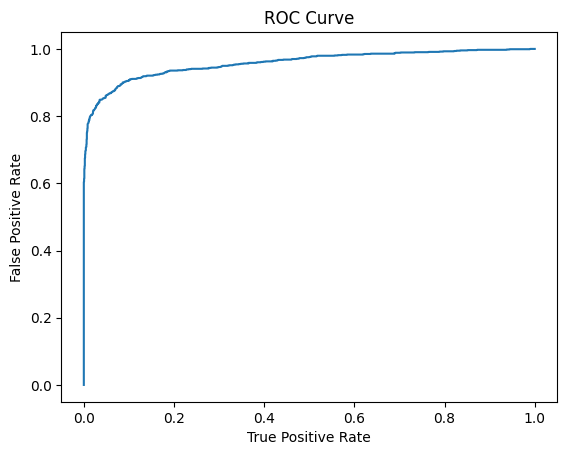

Training set Area Under ROC: 0.9580746824563063


In [ ]:
# calculate the statistics summary for the Logistic Regression model
trainingSummary = lrModel.summary

import matplotlib.pyplot as plt
# plot the ROC curve from the calculated summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set Area Under ROC: ' + str(trainingSummary.areaUnderROC))


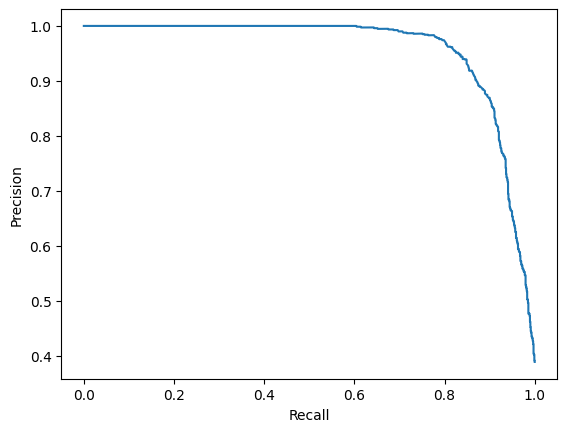

In [ ]:
#plot the recall and precision for the Logistic Regression model
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
# Testing the performance of the Logistic Regression classifier using the testing data
predictions = lrModel.transform(test)
predictions.select('label', 'prediction', 'rawPrediction', 'probability').show(10)

+-----+----------+--------------------+--------------------+
|label|prediction|       rawPrediction|         probability|
+-----+----------+--------------------+--------------------+
|  0.0|       0.0|[2.66631107457252...|[0.93500922595823...|
|  0.0|       0.0|[1.96040375075901...|[0.87657664088486...|
|  0.0|       0.0|[2.11425306902607...|[0.89228080279047...|
|  0.0|       0.0|[2.13138099047674...|[0.89391603912375...|
|  0.0|       0.0|[4.82123477637544...|[0.99200756113408...|
|  0.0|       0.0|[1.58219513636304...|[0.82951517819280...|
|  0.0|       0.0|[3.39058978483709...|[0.96740914496425...|
|  0.0|       0.0|[1.19174569819862...|[0.76705313556785...|
|  0.0|       0.0|[4.00870293770516...|[0.98216686436660...|
|  0.0|       0.0|[2.78755602491270...|[0.94199965911865...|
+-----+----------+--------------------+--------------------+
only showing top 10 rows



In [ ]:
# Import model evaluator only if not has been done before
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.9632962273348415


In [ ]:
# compute TN, TP, FN, and FP
predictions.groupBy('label', 'prediction').count().show()
# Calculate the elements of the confusion matrix
TN = predictions.filter('prediction = 0 AND label = prediction').count()
TP = predictions.filter('prediction = 1 AND label = prediction').count()
FN = predictions.filter('prediction = 0 AND label <> prediction').count()
FP = predictions.filter('prediction = 1 AND label <> prediction').count()
# calculate accuracy, precision, recall, and F1-score
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F = 2 * (precision*recall) / (precision + recall)
print('n precision: %0.3f' % precision)
print('n recall: %0.3f' % recall)
print('n accuracy: %0.3f' % accuracy)
print('n F1 score: %0.3f' % F)

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|  241|
|  0.0|       1.0|   17|
|  1.0|       0.0|   48|
|  0.0|       0.0|  416|
+-----+----------+-----+

n precision: 0.934
n recall: 0.834
n accuracy: 0.910
n F1 score: 0.881
